# Customer Segmentation: Credit Card Marketing
- Andrea Cohen
- 01.24.23

## Task:
  - To segment potential customers in order to determine how and what kind of credit cards should be marketed to each group.


## Data Source:
  - https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means

## Import Libraries

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load and inspect the data

### Load the dataset

In [2]:
# load the dataset and check for unnecessary columns
df = pd.read_csv('https://s3.amazonaws.com/General_V88/boomyeah2015/codingdojo/curriculum/content/chapter/cust_seg.csv', index_col = 'Customer Id')
display(df.head())
display(df.info())

,Unnamed: 0,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,,
1,0,41,2,6,19,0.124,1.073,0.0,6.3
2,1,47,1,26,100,4.582,8.218,0.0,12.8
3,2,33,2,10,57,6.111,5.802,1.0,20.9
4,3,29,2,4,19,0.681,0.516,0.0,6.3
5,4,47,1,31,253,9.308,8.908,0.0,7.2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 66.4 KB


None

#### Delete unnecessary columns

In [3]:
#Unnamed: 0 is an unnecessary column
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


  - There are no more unnecessary columns.

### Inspect the data

In [4]:
df.shape

(850, 8)

  - There are 850 rows and 8 columns.

In [5]:
# check datatypes
df.dtypes

Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
DebtIncomeRatio    float64
dtype: object

  - Age, Edu, Years Employed, and Income are all datatype int64.
  - Card Debt, Other Debt, Defaulted, and DebtIncomeRatio are all datatype float64.

In [6]:
# check for outliers and obvious errors
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


  - There are no obvious outliers or errors in the data.

In [7]:
# check for duplicated rows
df.duplicated().sum()

0

  - There are 0 duplicates.

In [8]:
# check for missing values
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

  - There are 150 missing values in Defaulted.
  - Options:
    - Dropping rows was not a good option because 17.65% of rows are missing data--too many (>2%) to just eliminate.
    - Dropping columns was not a good option because whether they defaulted might be an import property for clustering--additionally, it is one of the properties specifically requested by the company. Also, <50% of the data are missing, too little to just eliminate.
    - Creating a new category was not a good option because it would introduce errors that might skew the clusters.
    - Imputing the most frequent value was a good option because the most frequent value is most likely the value closest to the missing values.

In [9]:
display(df['Defaulted'].mode())

0    0.0
dtype: float64

In [10]:
df['Defaulted'].fillna(0.0, inplace=True)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

  - There are now 0 missing values.

In [11]:
#check for inconsistencies in categorical data
df['Edu'].value_counts()

1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64

In [12]:
df['Defaulted'].value_counts()

0.0    667
1.0    183
Name: Defaulted, dtype: int64

  - There are no inconsistencies in the categorical data.

## Scale the data

In [13]:
#instantiate standard scaler
scaler = StandardScaler()
#fit and transform data
scaled_df = scaler.fit_transform(df)

## KMeans Clustering

### Elbow plot of inertia

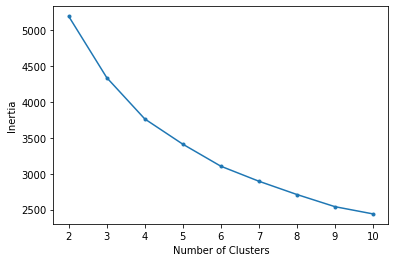

In [14]:
#create an empty list of inertias
inertias = []
#loop through k values between 2 and 10 and store the inertias in the list
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k, random_state=42)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)
#visualize scores
plt.plot(range(2, 11), inertias, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

  - The inertia plot does not have a very pronounced elbow at any number, but the graph seems to level off a bit at 4 clusters.  4 would be one candidate for a good number of clusters.

### Silhouette scores

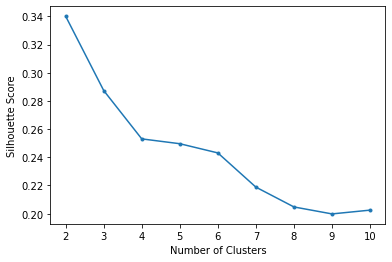

In [15]:
#save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i, random_state=42)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
#visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

  - The graph shows that 2 would be another candidate for a good number of clusters since it has the highest Silhouette Score.

  - Reviewing the elbow plot of inertia, it appears that the slope of the line between 2 and 3 clusters is steepest, which confirms that 2 is the best candidate for the number of clusters. 
  - Fitting 2 different KMeans models (one with 2 clusters and one with 4 clusters) and displaying the silhouette scores will again confirm the best number of clusters.

In [16]:
# instantiate two different KMeans models using 2 clusters and 4 clusters
kmeans2 = KMeans(n_clusters = 2, random_state=42)
kmeans4 = KMeans(n_clusters = 4, random_state=42)
# fit the models
kmeans2.fit(scaled_df)
kmeans4.fit(scaled_df)
# display the silhouette scores
print(f'Silhouette Score using 2 clusters: {silhouette_score(scaled_df, kmeans2.labels_)}')
print(f'Silhouette Score using 4 clusters: {silhouette_score(scaled_df, kmeans4.labels_)}')

Silhouette Score using 2 clusters: 0.3401172685946081
Silhouette Score using 4 clusters: 0.2530737177201414


- K = 2 has the highest silhouette score and a good elbow plot of inertia, making it the best candidate for the number of clusters.

### Save the final KMeans Clustering Model

In [17]:
# add the clusters as a new column in the original unscaled data frame
df['cluster'] = kmeans2.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,0
2,47,1,26,100,4.582,8.218,0.0,12.8,1
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,0
5,47,1,31,253,9.308,8.908,0.0,7.2,1


## Analytical Visualizations

In [18]:
#group the dataframe by cluster and aggregate by mean values
cluster_groups = df.groupby('cluster', as_index = False).mean()
cluster_groups

,cluster,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,32.968563,1.645210,6.492515,33.618263,0.937349,1.899054,0.215569,9.126796
1,1,42.593407,1.950549,16.175824,94.598901,3.923890,7.408731,0.214286,14.006593


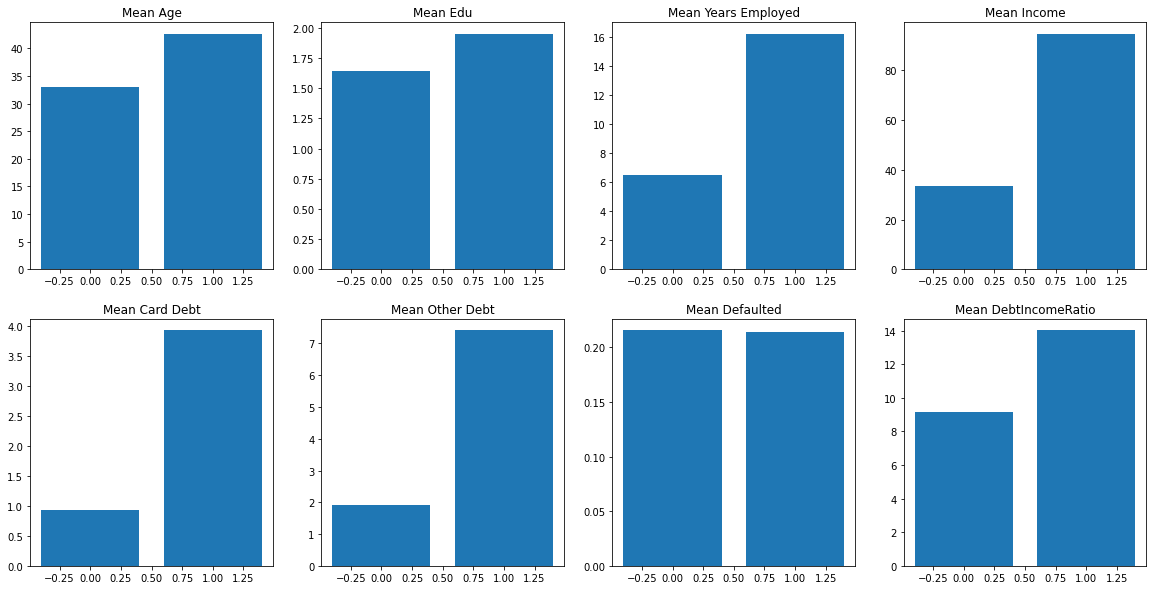

In [19]:
#visualize the means
fig, axes = plt.subplots(2, 4, figsize = (20, 10))
axes = axes.ravel()
#loop over columns (except 'cluster') and plot each in a separate figure
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

### Cluster Descriptions:

#### Cluster 0:
  - Cluster 0 customers were younger and less educated than cluster 1 customers.  They had been employed for fewer years and had lower income--these trends reduce their candidacy for credit card offers.  However, they also had lower debts (credit card and other) and lower debt to income ratio--these trends increase their candidacy for credit card offers.  They had the same default rate as cluster 1 customers, despite their lower debts, which was concerning.
  - The typical cluster 0 customer is in their 30's.  They have a bit of higher education, they've been employed for only about 6 or 7 years, and they make less than 40,000.  They have about 3000 in debt, which is less than 10% of their overall income.  However, they have defaulted on their debt at some point.
  - Overall, cluster 0 customers have less experience with employment, income, and money management--they carry less debt, especially compared to their income, but they default at a similar rate as cluster 1 customers.

#### Cluster 1:
  - Cluster 1 customers were older and more educated than cluster 0 customers.  They had been employed for a longer amount of time and had higher incomes, both demonstrating their employment stability--these trends increase their candidacy for credit card offers.  However, they also had higher debts (credit card and other) and higher debt to income ratios.  Their default rate was the same as cluster 0 customers--these trends indicate that their money management skills are superior to cluster 0 customers.
  - The typical cluster 1 customer is in their 40's, with a moderate amount of higher education.  They have been employed for more than 15 years, and they make more than 90,000.  They have more than 10,000 in debt, which might include home ownership--it is more than 14% of their overall income.  They have defaulted on their debt at some point in their long credit history.
  - Cluster 1 customers have more experience with employment, income, and money management--they showed superior money management skills compared to cluster 0 customers.



## Recommendations:

  - Based on their longer experience with employment, income, and money management, Cluster 1 customers are good candidates for credit card offers.  The offers should have high credit limits because they have significant income that they are willing to spend.  They should have lower interest rates because Cluster 1 customers know how to manage their debt.
  - Based on their debt, Cluster 0 customers are also good candidates for credit card offers.  The offers should have lower credit limits and higher interest rates though, because Cluster 0 customers have the same amount of defaults despite their lower debts.  They have some long-term potential as a credit customer because they are young and new to the workforce--perhaps they will earn higher credit limits and lower interest rates as they demonstrate more successful money management skills.